
# CEll based MOdel of NEurogenesis (CEMONE)


This notebook performs the numerical simulation of the model described in the article <br>
A MULTISCALE MATHEMATICAL MODEL OF CELL DYNAMICS DURING NEUROGENESIS IN THE MOUSE CEREBRAL CORTEX<br>
Postel Marie<sup>1</sup><br>
Karam Alice<sup>2</sup><br>
Pézeron Guillaume<sup>2</sup><br>
Schneider-Maunoury Sylvie<sup>2</sup><br>
Clément Frédérique<sup>3,4</sup><br>
<bR>
<b>1</b> Sorbonne Université, Université Paris-Diderot SPC, CNRS, Laboratoire Jacques-Louis Lions, LJLL, F-75005 Paris, France
<br>
<b>2</b> Sorbonne Université, CNRS UMR7622, Inserm U1156, Institut de Biologie Paris-Seine (IBPS), Laboratoire de Biologie du développement (LBD), F-75005, Paris
<br>
<b>3</b> Inria, Université Paris-Saclay
<br>
<b>4</b> LMS, Ecole Polytechnique, CNRS, Université Paris-Saclay<br><br>
    



#### For all inquiries about this notebook please contact <a href=mailto:marie.postel@sorbonne-universite.fr>Marie.Postel@sorbonne-universite.fr</a>

The model describes the dynamics of three cell types : apical progenitors (APs), intermediate progenitors (IPs) and neurons (Ns).  The IP population is separated into neurogenic IPs (IPNs), which divide into two neurons after resuming their cell cycle, and proliferative IPgenic IP (IPPs), which progress through one more cell cycle before becoming IPN in turn. Neurons are post-mitotic cells, they do not divide. The model takes into account the different modes of division undergone by progenitors, whose rates are time-dependent. 
<br>
The instantaneous flow of APs entering neurogenesis is denoted by $F_{AP}(t)$: 
$$F_{AP}(t)=K_{AP}\displaystyle\frac{e^{s_+(t-t_+)}}{(1+e^{s_+(t-t_+)})(1+e^{s_-(t-t_-)})}
$$
<br>
APs either give birth directly to neurons, with rate $(1-\beta(t))$ or to IPs with rate $\beta(t)$: 
$$\beta(t)=\beta_1+\displaystyle\dfrac{\beta_0-\beta_1}{1+\displaystyle e^{s_\beta(t-t_\beta)}}, ~~ \mbox{with }~~s_\beta>0$$
<br>
The proportion of IPP versus IPN new-born cells is further tuned by rate $\gamma(t)$:
$$\gamma(t)=\gamma_1+\displaystyle\dfrac{\gamma_0-\gamma_1}{1+\displaystyle e^{s_\gamma(t-t_\gamma)}},~~\mbox{with }s_\gamma>0
$$
Those rates combine to provide the expression of the AP flow entering the IPP compartment: $\beta(t)\gamma(t)F_{AP}(t)$, while  the AP flow entering the IPN compartment is: $\beta(t)(1-\gamma(t))F_{AP}(t)$.
<br>
The cell cycle durations for the two types of $IP$s are fixed and set to 
<table><tr><td>$T_C^{IPP}$ </td><td> $T_C^{IPN}$ </td></tr>
    <tr><td>29.4 h</td><td>26.2 h</td></tr></table>


Both IPP and IPN satisfy a transport equation, where the spatial variable $a$ is the cell age
$$\left\{\begin{array}{l}\partial_t X(t,a)+\partial_a X(t,a)=0,\quad t>0,\\
X(0,a)=X_0(a),\end{array}\right.$$
with boundary conditions
$$\left\{\begin{array}{l}IPP(t,0)=\gamma(t)\beta(t)F_{AP}(t)\\IPN(t,0)=(1-\gamma(t))\beta(t)F_{AP}(t)+2IPP(t,T_C^{IPP})\end{array}\right.$$

The outputs of the model are: 
<UL>
<LI>the number of neurons
$$N(t)=\displaystyle\int_0^t\left((1-\beta(\tau))F_{AP}(\tau)+2IPN(\tau,T_C^{IPN})\right)d\tau
$$</LI>
<LI>the number of proliferative IPs
$$\overline{IPP}(t)=\int_0^{T_C^{IPP}}IPP(t,a)da$$</LI>
<LI>the number of neurogenic IPs
$$\overline{IPN}(t)=\int_0^{T_C^{IPN}}IPN(t,a)da$$</LI>
</UL>


The first time the notebook is run, the model is simulated with the following set of parameters, which corresponds to scenario 1 in the article.

<table border="1"><tr>
            <td colspan=5 bgcolor=lightblue align=left> $F_{AP}\quad\quad\quad\quad$                </td><td colspan=4>        $\gamma\quad\quad\quad$  </td><td colspan=4 bgcolor=lightblue>       $\beta\quad\quad\quad$ </td></tr>
<tr><td bgcolor=lightblue>   $K_{AP}$</td><td bgcolor=lightblue> $s_+$ </td><td bgcolor=lightblue> $t_+$ </td><td bgcolor=lightblue>  $s_-$  </td><td bgcolor=lightblue> $t_-$  </td><td> $\gamma_0$</td><td> $\gamma_1$</td><td> $s_\gamma$</td><td> $t_\gamma$</td><td bgcolor=lightblue> $\beta_0$</td><td bgcolor=lightblue> $\beta_1$</td><td bgcolor=lightblue> $s_\beta$</td><td bgcolor=lightblue> $t_\beta$</td></tr>
<tr><td bgcolor=lightblue> 7.95</td><td bgcolor=lightblue> 1.47 </td><td bgcolor=lightblue> 11.87</td><td bgcolor=lightblue> 8.09 </td><td bgcolor=lightblue>17.05 </td><td>1 </td><td>1 </td><td>2.53 </td><td>14.65 </td><td bgcolor=lightblue> 1. </td><td bgcolor=lightblue>1. </td><td bgcolor=lightblue> 1 </td><td bgcolor=lightblue>20</td></Tr></table>

A figure appears and displays several model outputs on six panels
<ul>
<li> Panel A : division rates  $\gamma(t) $ et $\beta(t)$
<li> Panel B : input flux of $AP$ cells  $F_{AP}(t)$
<li> Panel C : cumulative number of $AP$ cells that have entered neurogenesis $\int_0^tF_{AP}(\tau)d\tau$
<li> Panel D : total number of  $IP$ cells $\overline{IP}(t)=\overline{IPN}(t)+\overline{IPP}(t)$
<li> Panel E : number of proliferative  $IP$ cells $\overline{IPP}(t)$
<li> Panel F : number of  neurons $N(t)$
</ul>


The users can modify the parameters of $\gamma(t)$, $\beta (t)$ and $F_{AP}(t)$ with the sliders. The outputs of the model are updated according to the new parameter values (blue curves). For the sake of comparison, the outputs corresponding to the reference parameter set are left on each panel (red curves).

<IPython.core.display.Javascript object>


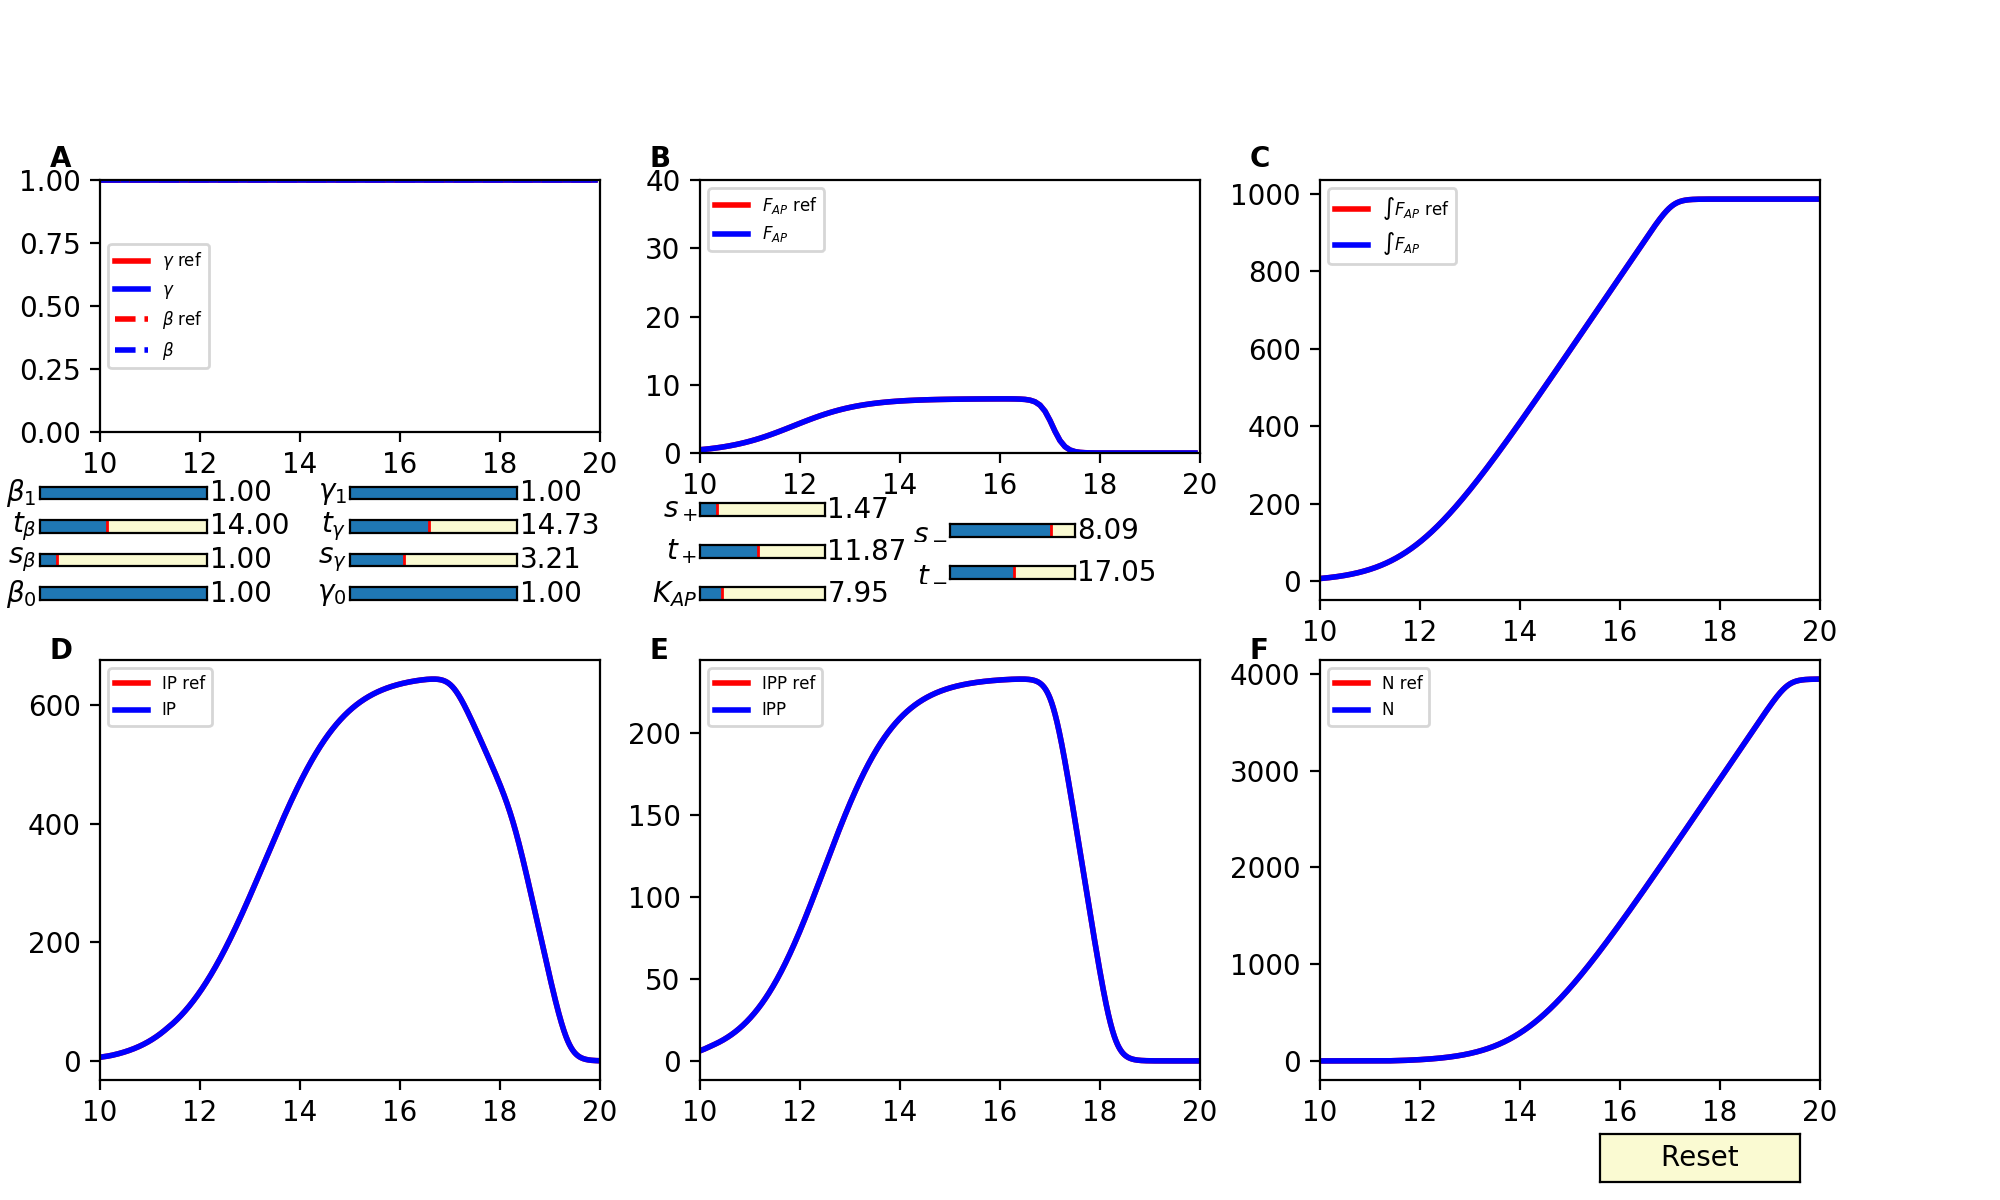

In [1]:
%matplotlib notebook
import display_cemone

One can for instance reproduce the other scenarios studied in the article by selecting the parameter values corresponding to scenario 2 ou 3.
<table border="1"><tr>
    <td></td>  <td colspan=5 bgcolor=lightblue align=left> $F_{AP}\quad\quad\quad\quad\quad$                </td><td colspan=4>        $\gamma\quad\quad\quad$  </td><td colspan=4 bgcolor=lightblue>       $\beta\quad\quad\quad$ </td></tr>
<tr><td>scenario</td><td bgcolor=lightblue>   $K_{AP}$</td><td bgcolor=lightblue> $s_+$ </td><td bgcolor=lightblue> $t_+$ </td><td bgcolor=lightblue>  $s_-$  </td><td bgcolor=lightblue> $t_-$  </td><td> $\gamma_0$</td><td> $\gamma_1$</td><td> $s_\gamma$</td><td> $t_\gamma$</td><td bgcolor=lightblue> $\beta_0$</td><td bgcolor=lightblue> $\beta_1$</td><td bgcolor=lightblue> $s_\beta$</td><td bgcolor=lightblue> $t_\beta$</td></tr>
<tr><td>2</td><td bgcolor=lightblue> 7.20 </td><td bgcolor=lightblue> 2.30 </td><td bgcolor=lightblue> 11.55 </td><td bgcolor=lightblue> 10.00 </td><td bgcolor=lightblue>16.43 </td><td>0.51 </td><td>1.0 </td><td>3.21</td><td>14.76</td><td bgcolor=lightblue> 1 </td><td bgcolor=lightblue>1 </td><td bgcolor=lightblue> 1 </td><td bgcolor=lightblue>20</td></Tr>
<tr><td>3</td><td bgcolor=lightblue> 8.90 </td><td bgcolor=lightblue> 3.17 </td><td bgcolor=lightblue> 11.91 </td><td bgcolor=lightblue>3.12</td><td bgcolor=lightblue>17.14 </td><td>0.28 </td><td>0.46 </td><td>10.00</td><td>14.32 </td><td bgcolor=lightblue> 1 </td><td bgcolor=lightblue>1 </td><td bgcolor=lightblue> 1 </td><td bgcolor=lightblue>20</td></Tr></table>
